In [ ]:
import ipywidgets as W

In [ ]:
W.Button(description='按鈕')

In [ ]:
def f(x):
    return 2**x

In [ ]:
W.interact(f, x=W.IntSlider(min=-10, max=10, value=0));

In [ ]:
W.interact(f, x=W.FloatSlider(min=-10, max=10, value=0));

In [ ]:
def hello(name):
    return "Hello "+name+"!"
W.interact(hello, name="Alice");

In [ ]:
@W.interact(name="Alice")
def hello(name):
    return "Hello {}!".format(name)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10, 10, 100)
plt.plot(x, x**2)

In [ ]:
@W.interact(a=W.IntSlider(min=-5,max=5,value=1), 
            b=W.IntSlider(min=-5,max=5,value=0), 
            c=W.IntSlider(min=-5,max=5,value=0))
def plot1(a, b, c):
    plt.plot(x, a*x**2+b*x+c)

In [ ]:
@W.interact(a=W.IntSlider(min=-5,max=5,value=1))
def plot1(a):
    plt.plot(x, np.sin(a*x))

In [ ]:
W.HTML('<a href="https://google.com">kkk</a>')

In [ ]:
button = W.Button(description='A')
def onclick(b):
    print(b)
button.on_click(onclick)
button

In [ ]:
from IPython.display import display
buttons = [W.Button(description=c) for c in "上下左右"]
for b in buttons:
    display(b)

In [ ]:
from IPython.display import display
buttons = [W.Button(description=c) for c in "上下左右"]
W.VBox(buttons)

In [ ]:
W.VBox([W.HBox(buttons[:2]),W.HBox(buttons[2:])])

In [ ]:
from IPython.display import display
buttons = [W.Button(description=c) for c in "上下左右"]
def onclick(b):
    print(b)
for b in buttons:
    b.on_click(onclick)
W.HBox(buttons)

A Jupyter Widget

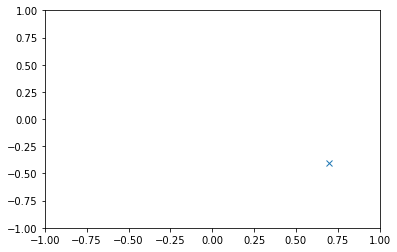

In [63]:
from IPython.display import clear_output
buttons = [W.Button(description=c) for c in "上下左右"]
x=[0]
y=[0]
def render(b):
    if b.description=='上':
        y[0]+=.1
    if b.description=='下':
        y[0]-=.1
    if b.description=='右':
        x[0]+=.1
    if b.description=='左':
        x[0]-=.1
    clear_output()
    display(W.HBox(buttons))
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.plot(x,y, 'x')
for b in buttons:
    b.on_click(render)
W.HBox(buttons)

A Jupyter Widget

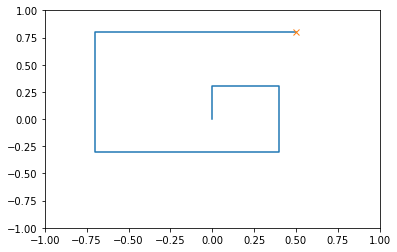

In [65]:
from IPython.display import clear_output
buttons = [W.Button(description=c) for c in "上下左右"]
x=[0]
y=[0]
def render(b):
    x0, y0 = x[-1], y[-1]
    if b.description=='上':
        y0+=.1
    if b.description=='下':
        y0-=.1
    if b.description=='右':
        x0+=.1
    if b.description=='左':
        x0-=.1
    x.append(x0)
    y.append(y0)
    clear_output()
    display(W.HBox(buttons))
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.plot(x,y)
    plt.plot([x0], [y0], 'x')
for b in buttons:
    b.on_click(render)
W.HBox(buttons)

In [153]:
grid = np.zeros((4,4), dtype='int')
grid

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [79]:
for l in grid:
    print("{:4d} {:4d} {:4d} {:4d}".format(l[0], l[1], l[2], l[3]) )

   0    0    0    0
   0    0  256    0
   0    0    0    0
   0    0    0    0


In [100]:
def print_grid(grid):
    print("-"*19)
    for l in grid:
        print( "|".join(["{:4d}"]*4).format(*l) )
        print("-"*19)
print_grid(grid)

-------------------
   0|   0|   0|   0
-------------------
   0|2048| 256|   0
-------------------
   0|   0|   0|   0
-------------------
   0|   0|   0|   0
-------------------


In [101]:
def empty_squares(grid):
    return np.argwhere(grid==0)

In [155]:
def add_new_square(grid):
    sq = empty_squares(grid)
    if sq.shape[0] == 0:
        return False
    np.random.shuffle(sq)
    grid[tuple(sq[0])]= 2 if np.random.randint(0,10) else 4
    return True
print(add_new_square(grid))
print_grid(grid)

True
-------------------
   0|   0|   0|   0
-------------------
   0|   0|   2|   0
-------------------
   0|   0|   0|   0
-------------------
   0|   0|   2|   0
-------------------


In [156]:
grid0 = grid.copy()